In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "suPer2k23",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [4]:
con = PostgresConnection().getConnection()

successfully connected to database


# Q1: Find the division wise total_sale_price joining fact table and respective dimension table

In [6]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "GROUP BY CUBE(s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [7]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [8]:
df_q1 = pd.DataFrame(records, columns=['division', 'sales'])
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [9]:
df_q1 =df_q1.drop(7)

In [10]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [11]:
def changetype(x):
    x['sales']=x['sales'].astype('float64')  

In [12]:
changetype(df_q1)

In [13]:
df_q1

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [14]:
df_q1=df_q1.set_index(['division'])
df_q1

,sales
division,
BARISAL,7520343.75
CHITTAGONG,19763595.00
DHAKA,40764619.75
KHULNA,11311610.50
RAJSHAHI,12099196.00
RANGPUR,8429836.50
SYLHET,5512234.25


<Axes: ylabel='sales'>

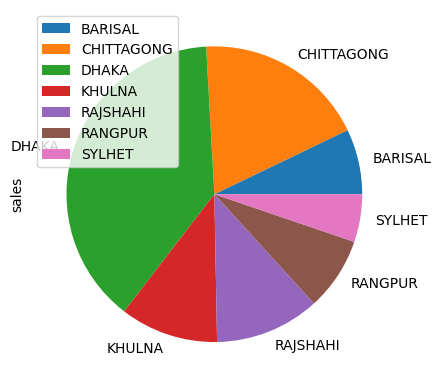

In [15]:
df_q1.plot.pie(y='sales')

In [ ]:
plt.figure(figsize=(10,5))
df_q1.plot.bar(y='sales')

In [ ]:
Q1: Find the year wise total_sale_price joining fact table and respective dimension table

In [16]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.year) " \
                "ORDER BY s.year "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [17]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [ ]:
Q1: Find the month wise total_sale_price joining fact table and respective dimension table

In [18]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.month, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "GROUP BY CUBE(s.month) " \
                "ORDER BY s.month "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [19]:
records

[(1, Decimal('9042244.00')),
 (2, Decimal('8073877.50')),
 (3, Decimal('8939152.00')),
 (4, Decimal('8504634.75')),
 (5, Decimal('9078002.50')),
 (6, Decimal('8556853.00')),
 (7, Decimal('9046580.00')),
 (8, Decimal('8929475.25')),
 (9, Decimal('8724326.50')),
 (10, Decimal('8902783.75')),
 (11, Decimal('8680026.00')),
 (12, Decimal('8923480.50')),
 (None, Decimal('105401435.75'))]

In [ ]:
Q2: Find the customer wise total_sale_price joining fact table and respective dimension table

In [20]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT c.name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim c on c.customer_key=t.customer_key " \
                "GROUP BY CUBE(c.name) " \
                "ORDER BY c.name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [21]:
records

[('-', Decimal('20643.50')),
 ('aafreen fatima', Decimal('11174.75')),
 ('aafrin', Decimal('22136.75')),
 ('aafrin @ dolly', Decimal('23529.75')),
 ('aaftaab husan', Decimal('9682.00')),
 ('aakanksha', Decimal('11469.00')),
 ('aaliya', Decimal('21663.25')),
 ('aamina', Decimal('12649.25')),
 ('aamir', Decimal('10134.00')),
 ('aamir hussain', Decimal('10892.50')),
 ('aamod & pramod', Decimal('12280.25')),
 ('aamrin jahan', Decimal('11622.00')),
 ('aanamika misra', Decimal('8929.25')),
 ('aanchal', Decimal('35703.50')),
 ('aanik with her son', Decimal('8568.25')),
 ('aansi devi', Decimal('9909.00')),
 ('aanya @ china', Decimal('11443.50')),
 ('aaradhana @ priyanka', Decimal('11469.25')),
 ('aarifa bano', Decimal('11295.75')),
 ('aarifun bivi', Decimal('13139.25')),
 ('aarti', Decimal('661675.25')),
 ('aarti @ kajal', Decimal('12108.50')),
 ('aarti @ noni', Decimal('12335.50')),
 ('aarti bunkar', Decimal('13661.75')),
 ('aarti devi', Decimal('26537.00')),
 ('aarti diwakar', Decimal('10892

In [ ]:
Q2: Find the bank wise total_sale_price joining fact table and respective dimension table

In [22]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT b.bank_name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.trans_dim b on b.payment_key=t.payment_key " \
                "GROUP BY CUBE(b.bank_name) " \
                "ORDER BY b.bank_name "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [23]:
records

[('AB Bank Limited', Decimal('2728515.50')),
 ('Bangladesh Commerce Bank Limited', Decimal('2730999.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Bengal Commercial Bank Ltd', Decimal('2704554.25')),
 ('Bkash', Decimal('2689352.50')),
 ('BRAC Bank Limited', Decimal('2705795.75')),
 ('Citizens Bank Limited', Decimal('2723215.25')),
 ('City Bank Limited', Decimal('2713952.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Dhaka Bank Limited', Decimal('2728366.00')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Meghna Bank Limited', Decimal('2700528.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Modhumoti Bank Limited', Decimal('2715279.00')),
 ('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Nagad', Decimal('2699554.50')),
 ('N

In [ ]:
Q2: Find the transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

In [24]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT b.trans_type, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.trans_dim b on b.payment_key=t.payment_key " \
                "GROUP BY CUBE(b.trans_type) " \
                "ORDER BY b.trans_type "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [25]:
records

[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

In [ ]:
Q3: Total sales in Barisal

In [59]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "WHERE s.division = 'BARISAL'"\
                "GROUP BY CUBE(s.division)" \
                
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [60]:
records

[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [ ]:
Q4: Total sales in 2015

In [62]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "WHERE s.year = '2015'"\
                "GROUP BY CUBE(s.year)" 
                
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [63]:
records

[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [ ]:
Q5: Total sales of Barisal in 2015

In [65]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.year, r.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.time_dim s on s.time_key=t.time_key " \
                "JOIN ecomdb_star_schema.store_dim r on r.store_key=t.store_key " \
                 "WHERE s.year = '2015' and r.division = 'BARISAL' " \
                "GROUP BY CUBE(s.year,r.division) " 
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [66]:
records

[(2015, 'BARISAL', Decimal('1076902.75')),
 (2015, None, Decimal('1076902.75')),
 (None, None, Decimal('1076902.75')),
 (None, 'BARISAL', Decimal('1076902.75'))]

In [ ]:
Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

    S1-> item1 -> quantity_sales

    S1-> item2 -> quantity_sales

    S1-> item3 -> quantity_sales

In [14]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key as store_key, i.item_name as item_name, sum(ft.quantity) as quantity_sales_per_item " \
"FROM ecomdb_star_schema.fact_table ft " \
"JOIN ecomdb_star_schema.store_dim s ON s.store_key = ft.store_key "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = ft.item_key "\
"GROUP BY CUBE (s.store_key, i.item_name)" \
"ORDER BY s.store_key, quantity_sales_per_item "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [15]:
records

[('S0001', "Reese's Peanutbutter Cups 2/pk", Decimal('4')),
 ('S0001', 'Tejava Unsweetened Black Tea 16.9oz', Decimal('4')),
 ('S0001', 'Perrier Flavors Sparkling Water 16.9oz', Decimal('5')),
 ('S0001', 'Dawn Ultra Dish Detergent, Original Scent ', Decimal('6')),
 ('S0001', 'Fresca Peach Citrus - 12 oz cans', Decimal('6')),
 ('S0001', 'Monster Zero Ultra 16 oz', Decimal('7')),
 ('S0001', 'A&W Root Beer Diet - 12 oz cans', Decimal('8')),
 ('S0001', 'Extra Variety Packs Sugar Free', Decimal('8')),
 ('S0001', 'Nabisco Classic Mix ccooki, cracker', Decimal('8')),
 ('S0001', 'M&M Peanut Butter 1.6 oz', Decimal('9')),
 ('S0001', 'Kleenex Tissue Rectangle Boxes 160/box', Decimal('9')),
 ('S0001', 'Wonderful Pistachios (in shell)', Decimal('9')),
 ('S0001', 'Ozarka Spring Water Mini 8oz', Decimal('9')),
 ('S0001', 'Diet Pepsi - 12 oz cans', Decimal('9')),
 ('S0001', 'Goldfish Pepperidge Farm Cheddar 1.5oz ', Decimal('10')),
 ('S0001', '100% Juice Box Variety 6.75 oz ', Decimal('10')),
 ('S000

In [ ]:
Q7: What products have been sold through card or mobile since X days?

    input: X = 5 days

    output: [item1, item2, item3, ...........]

In [7]:
#Enter number of days. (more than 1020)
number_of_days = input('Enter number of days: ')

Enter number of days: 1020


In [15]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name, t.t_date "\
"FROM ecomdb_star_schema.fact_table ft "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = ft.item_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = ft.time_key "\
"JOIN ecomdb_star_schema.trans_dim trans ON trans.payment_key = ft.payment_key "\
"WHERE t.t_date > (CURRENT_DATE - INTERVAL '"+ str(number_of_days)+ " day') AND (trans.trans_type = 'card' or trans.trans_type='mobile' ) " 
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [16]:
records

[('Cheez It White Cheddar 1.5 oz', datetime.date(2021, 1, 9)),
 ('Hazelnut International Delight', datetime.date(2020, 10, 20)),
 ('Ice Breaker Mints Sugar Free ', datetime.date(2020, 8, 24)),
 ('Coke Zero Sugar 12 oz cans', datetime.date(2020, 10, 18)),
 ('Coke Zero Sugar 12 oz cans', datetime.date(2021, 1, 3)),
 ('Red Bull Sugar Free 8.4 oz', datetime.date(2020, 9, 13)),
 ("Kellogg's Cereals Assortment Pack ", datetime.date(2021, 1, 4)),
 ('Fresca Black Cherry - 12 oz cans', datetime.date(2020, 11, 2)),
 ('Sargento String Cheese 0.75oz', datetime.date(2020, 11, 2)),
 ('Brisk Lemon Iced Tea - 12 oz cans', datetime.date(2020, 10, 29)),
 ('Pure White Sugar Packets', datetime.date(2020, 10, 20)),
 ('Stirrers Coffee Stirs 7inch', datetime.date(2020, 10, 6)),
 ('K Cups - McCafe Premium Roast', datetime.date(2020, 8, 11)),
 ('Coffee-Mate French Vanilla Cold', datetime.date(2020, 8, 16)),
 ('Dole Fruit in Gel Cups 4.3 oz', datetime.date(2021, 1, 9)),
 ('Waterloo Sparkling Grapefruit 12oz', d

In [ ]:
Q8: What season(quarter) is the worst for each product item? As example,

       item1-> q1

       item2-> q2

In [17]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name as item, t.quarter, SUM(ft.total_price) as total_sales_price "\
"FROM ecomdb_star_schema.fact_table ft "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = ft.time_key "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = ft.item_key "\
"GROUP BY CUBE(i.item_name, t.quarter) "\
"ORDER BY i.item_name, total_sales_price "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [18]:
records

[('100% Juice Box Variety 6.75 oz ', 'Q1', Decimal('85470.0')),
 ('100% Juice Box Variety 6.75 oz ', 'Q4', Decimal('87090.0')),
 ('100% Juice Box Variety 6.75 oz ', 'Q2', Decimal('88140.0')),
 ('100% Juice Box Variety 6.75 oz ', 'Q3', Decimal('90675.0')),
 ('100% Juice Box Variety 6.75 oz ', None, Decimal('351375.0')),
 ('A&W Root Beer - 12 oz cans', 'Q2', Decimal('65952.5')),
 ('A&W Root Beer - 12 oz cans', 'Q4', Decimal('66930.0')),
 ('A&W Root Beer - 12 oz cans', 'Q1', Decimal('68597.5')),
 ('A&W Root Beer - 12 oz cans', 'Q3', Decimal('70184.5')),
 ('A&W Root Beer - 12 oz cans', None, Decimal('271664.5')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q4', Decimal('37725.75')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q2', Decimal('37982.25')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q3', Decimal('40095.00')),
 ('A&W Root Beer Diet - 12 oz cans', 'Q1', Decimal('40675.50')),
 ('A&W Root Beer Diet - 12 oz cans', None, Decimal('156478.50')),
 ('Advil 2 pill packets', 'Q1', Decimal('76342.0')),
 ('A

In [ ]:
Q9: Break down the total sales of items geographically (division-wise).

     item1-> division1->total_sales

     item1-> division2->total_sales

In [19]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.item_name, s.division, SUM(f.total_price) as total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key "\
"JOIN ecomdb_star_schema.store_dim s ON s.store_key = f.store_key "\
"GROUP BY CUBE(i.item_name, s.division) "\
"ORDER BY i.item_name, s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [20]:
records

[('100% Juice Box Variety 6.75 oz ', 'BARISAL', Decimal('23790.0')),
 ('100% Juice Box Variety 6.75 oz ', 'CHITTAGONG', Decimal('64950.0')),
 ('100% Juice Box Variety 6.75 oz ', 'DHAKA', Decimal('141195.0')),
 ('100% Juice Box Variety 6.75 oz ', 'KHULNA', Decimal('37755.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RAJSHAHI', Decimal('38730.0')),
 ('100% Juice Box Variety 6.75 oz ', 'RANGPUR', Decimal('26685.0')),
 ('100% Juice Box Variety 6.75 oz ', 'SYLHET', Decimal('18270.0')),
 ('100% Juice Box Variety 6.75 oz ', None, Decimal('351375.0')),
 ('A&W Root Beer - 12 oz cans', 'BARISAL', Decimal('19101.5')),
 ('A&W Root Beer - 12 oz cans', 'CHITTAGONG', Decimal('52060.5')),
 ('A&W Root Beer - 12 oz cans', 'DHAKA', Decimal('107479.0')),
 ('A&W Root Beer - 12 oz cans', 'KHULNA', Decimal('28382.0')),
 ('A&W Root Beer - 12 oz cans', 'RAJSHAHI', Decimal('27795.5')),
 ('A&W Root Beer - 12 oz cans', 'RANGPUR', Decimal('21597.0')),
 ('A&W Root Beer - 12 oz cans', 'SYLHET', Decimal('15249.0')),
 (

In [ ]:
Q10: What are the average sales of products sales per store monthly?

     S1->M1-> avg_sales

           s1-> M2 -> avg_sales

In [22]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key, t.month, AVG(f.total_price) as Average_price "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.store_dim s ON s.store_key = f.store_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key " \
"GROUP BY CUBE(s.store_key, t.month) "\
"ORDER BY s.store_key, t.month "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [23]:
records

[('S0001', 1, Decimal('97.7543103448275862')),
 ('S0001', 2, Decimal('100.5776699029126214')),
 ('S0001', 3, Decimal('109.4158878504672897')),
 ('S0001', 4, Decimal('98.8805309734513274')),
 ('S0001', 5, Decimal('99.5245535714285714')),
 ('S0001', 6, Decimal('101.2459349593495935')),
 ('S0001', 7, Decimal('103.9189189189189189')),
 ('S0001', 8, Decimal('105.1269531250000000')),
 ('S0001', 9, Decimal('96.1901041666666667')),
 ('S0001', 10, Decimal('104.6166666666666667')),
 ('S0001', 11, Decimal('103.8355855855855856')),
 ('S0001', 12, Decimal('107.8697478991596639')),
 ('S0001', None, Decimal('102.5407569141193595')),
 ('S0002', 1, Decimal('98.2902684563758389')),
 ('S0002', 2, Decimal('106.3849557522123894')),
 ('S0002', 3, Decimal('102.7565217391304348')),
 ('S0002', 4, Decimal('104.0798969072164948')),
 ('S0002', 5, Decimal('109.1587591240875912')),
 ('S0002', 6, Decimal('100.9268867924528302')),
 ('S0002', 7, Decimal('95.6513157894736842')),
 ('S0002', 8, Decimal('108.9462809917355

# 1.1 Show the average sales in each district in year 2020

In [6]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, AVG(f.total_price) as Average_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.store_dim s ON s.store_key = f.store_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key " \
"WHERE t.year = '2020' " \
"GROUP BY CUBE(s.division) "\
"ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [7]:
records

[('BARISAL', Decimal('106.1183540585528248')),
 ('CHITTAGONG', Decimal('105.4187358916478555')),
 ('DHAKA', Decimal('105.3038819229586206')),
 ('KHULNA', Decimal('105.3044358790096034')),
 ('RAJSHAHI', Decimal('105.4912483990973959')),
 ('RANGPUR', Decimal('105.5914666084679179')),
 ('SYLHET', Decimal('104.9432337906914178')),
 (None, Decimal('105.4094861729347026'))]

# 1.2 Find the district that has the minimum sales over the last 6 years 

In [8]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(f.total_price) as Total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.store_dim s ON s.store_key = f.store_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key " \
"WHERE t.year <= 2023 AND t.year >= 2018 " \
"GROUP BY CUBE(s.district) "\
"ORDER BY s.district "
cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [9]:
records

[('BAGERHAT', Decimal('585543.25')),
 ('BANDARBAN', Decimal('429459.25')),
 ('BARGUNA', Decimal('390108.75')),
 ('BARISAL', Decimal('1262973.75')),
 ('BHOLA', Decimal('436202.50')),
 ('BOGRA', Decimal('752647.00')),
 ('BRAHMANBARIA', Decimal('585918.25')),
 ('CHANDPUR', Decimal('513575.75')),
 ('CHAPAI NABABGANJ', Decimal('331012.00')),
 ('CHITTAGONG', Decimal('3161219.50')),
 ('CHUADANGA', Decimal('244841.00')),
 ('COMILLA', Decimal('1006646.00')),
 ("COX'S BAZAR", Decimal('517387.50')),
 ('DHAKA', Decimal('10278911.25')),
 ('DINAJPUR', Decimal('816677.00')),
 ('FARIDPUR', Decimal('560317.50')),
 ('FENI', Decimal('359648.00')),
 ('GAIBANDHA', Decimal('426354.50')),
 ('GAZIPUR', Decimal('317862.50')),
 ('GOPALGANJ', Decimal('318640.25')),
 ('HABIGANJ', Decimal('504060.50')),
 ('JAMALPUR', Decimal('433627.25')),
 ('JESSORE', Decimal('490648.75')),
 ('JHALOKATI', Decimal('251752.50')),
 ('JHENAIDAH', Decimal('378800.75')),
 ('JOYPURHAT', Decimal('322095.50')),
 ('KHAGRACHHARI', Decimal('

# 2.1 Find the customer who has spent most money in 2019 - 2020

In [21]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT c.name, SUM(f.total_price) as total_expense "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"JOIN ecomdb_star_schema.customer_dim c ON c.customer_key = f.customer_key "\
"WHERE t.year >= 2019 AND t.year <= 2020 "\
"GROUP BY CUBE(c.name)" \
"ORDER BY total_expense DESC"

cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [22]:
records

[(None, Decimal('29986700.50')),
 ('pooja', Decimal('607420.00')),
 ('jyoti', Decimal('371639.00')),
 ('neha', Decimal('291428.50')),
 ('sunita', Decimal('260926.75')),
 ('poonam', Decimal('257645.75')),
 ('priyanka', Decimal('234677.25')),
 ('seema', Decimal('233005.75')),
 ('suman', Decimal('207851.50')),
 ('mamta', Decimal('197725.25')),
 ('nisha', Decimal('193207.25')),
 ('rekha', Decimal('189917.50')),
 ('komal', Decimal('189168.75')),
 ('aarti', Decimal('187795.75')),
 ('kajal', Decimal('187244.50')),
 ('laxmi', Decimal('183764.00')),
 ('kavita', Decimal('173333.50')),
 ('pinki', Decimal('172811.75')),
 ('manisha', Decimal('170391.75')),
 ('preeti', Decimal('168069.25')),
 ('anita', Decimal('165056.75')),
 ('sangeeta', Decimal('139713.25')),
 ('reena', Decimal('137175.75')),
 ('renu', Decimal('136572.75')),
 ('kiran', Decimal('134229.75')),
 ('anjali', Decimal('128251.00')),
 ('geeta', Decimal('127773.50')),
 ('sapna', Decimal('126589.25')),
 ('shivani', Decimal('123695.50')),
 (

# 2.2 Find the customers who has spent more money than average money of all the customers in 2018-2020

In [31]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "WITH customer_sales AS ( "\
"SELECT c.name as name, SUM(f.total_price) as total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.customer_dim c ON c.customer_key = f.customer_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE t.year >=2018 AND t.year <= 2020 "\
"GROUP BY CUBE(c.name) "\
" ) "\
"SELECT name, total_sales FROM customer_sales " \
"WHERE total_sales > (SELECT SUM(total_sales)/COUNT(total_sales) FROM customer_sales) "\
"ORDER BY total_sales DESC"

cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [32]:
records

[(None, Decimal('45094897.75')),
 ('pooja', Decimal('909662.75')),
 ('jyoti', Decimal('559850.75')),
 ('neha', Decimal('434726.00')),
 ('sunita', Decimal('393558.50')),
 ('poonam', Decimal('386981.50')),
 ('seema', Decimal('348114.50')),
 ('priyanka', Decimal('344182.75')),
 ('suman', Decimal('315098.00')),
 ('komal', Decimal('297851.50')),
 ('mamta', Decimal('292709.25')),
 ('nisha', Decimal('291755.75')),
 ('aarti', Decimal('283267.00')),
 ('kajal', Decimal('280920.25')),
 ('rekha', Decimal('278409.00')),
 ('laxmi', Decimal('277038.00')),
 ('kavita', Decimal('264068.50')),
 ('pinki', Decimal('256065.00')),
 ('manisha', Decimal('254059.25')),
 ('preeti', Decimal('251057.50')),
 ('anita', Decimal('249037.75')),
 ('sangeeta', Decimal('209694.50')),
 ('reena', Decimal('207858.25')),
 ('renu', Decimal('202508.75')),
 ('kiran', Decimal('199486.25')),
 ('shivani', Decimal('189756.75')),
 ('anjali', Decimal('189328.50')),
 ('geeta', Decimal('186601.25')),
 ('sapna', Decimal('184166.00')),
 (

# 3.1 For each country , count items which was sold more in 2020 than in 2019

In [70]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "WITH item_sales_2019 AS ( "\
"SELECT i.item_name as name, i.man_country as country, SUM(f.total_price) as total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE t.year =2019 "\
"GROUP BY CUBE(name, country) "\
" ), item_sales_2020 AS ( "\
"SELECT i.item_name as name, i.man_country as country, SUM(f.total_price) as total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE t.year =2020 "\
"GROUP BY CUBE(name, country) "\
" ) " \
"SELECT i20.country, COUNT(i20.name) as count FROM item_sales_2020 as i20 JOIN item_sales_2019 as i19 ON i20.name = i19.name AND i20.total_sales > i19.total_sales "\
"GROUP BY CUBE (i20.country)"\
"ORDER BY i20.country "

cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [71]:
records

[('Bangladesh', 30),
 ('Cambodia', 23),
 ('China', 14),
 ('Finland', 38),
 ('Germany', 35),
 ('India', 37),
 ('Lithuania', 26),
 ('Netherlands', 33),
 ('poland', 30),
 ('United States', 20),
 (None, 287),
 (None, 573)]

# 3.2 List the items which are sold more in Bangladesh than any other country in 2018 

In [61]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "WITH item_sales_bd AS ( "\
"SELECT i.item_name as name, SUM(f.total_price) as total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE t.year =2018 AND man_country = 'Bangladesh' "\
"GROUP BY CUBE(name) "\
" ), item_sales AS ( "\
"SELECT i.item_name as name, SUM(f.total_price) as total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE t.year =2018 "\
"GROUP BY CUBE(name) "\
" ) " \
"SELECT COUNT(ibd.name) FROM item_sales_bd as ibd JOIN item_sales as iall ON ibd.total_sales > iall.total_sales" 

cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [62]:
records

[(4277,)]

In [64]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT COUNT(i.item_key) "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE t.year =2018 AND man_country = 'Bangladesh' "


cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [65]:
records

[(18324,)]

# 4.1 Show top 3 divison according to number of products sold form 2016 to 2022

In [84]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, COUNT(f.item_key) as count "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.store_dim s ON s.store_key = f.store_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE t.year >= 2016 AND t.year <= 2022 "\
"GROUP BY CUBE (s.division) "\
"ORDER BY count DESC"


cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [85]:
records

[(None, 720431),
 ('DHAKA', 278558),
 ('CHITTAGONG', 135027),
 ('RAJSHAHI', 82898),
 ('KHULNA', 77104),
 ('RANGPUR', 57751),
 ('BARISAL', 51445),
 ('SYLHET', 37648)]

# 4.2 Show top 3 sold products in each division from 2016 to 2020

In [86]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, f.item_key, COUNT(f.item_key) as total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.store_dim s ON s.store_key = f.store_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE t.year >= 2016 AND t.year <= 2022 "\
"GROUP BY CUBE (s.division, f.item_key) "\
"ORDER BY s.division, total_sales DESC"


cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [87]:
records

[('BARISAL', None, 51445),
 ('BARISAL', 'I00254', 231),
 ('BARISAL', 'I00072', 230),
 ('BARISAL', 'I00049', 229),
 ('BARISAL', 'I00255', 227),
 ('BARISAL', 'I00054', 227),
 ('BARISAL', 'I00246', 226),
 ('BARISAL', 'I00167', 221),
 ('BARISAL', 'I00226', 221),
 ('BARISAL', 'I00124', 220),
 ('BARISAL', 'I00015', 218),
 ('BARISAL', 'I00027', 218),
 ('BARISAL', 'I00097', 218),
 ('BARISAL', 'I00252', 217),
 ('BARISAL', 'I00061', 217),
 ('BARISAL', 'I00111', 217),
 ('BARISAL', 'I00187', 215),
 ('BARISAL', 'I00081', 215),
 ('BARISAL', 'I00166', 215),
 ('BARISAL', 'I00200', 215),
 ('BARISAL', 'I00178', 215),
 ('BARISAL', 'I00119', 215),
 ('BARISAL', 'I00221', 214),
 ('BARISAL', 'I00064', 214),
 ('BARISAL', 'I00099', 214),
 ('BARISAL', 'I00104', 213),
 ('BARISAL', 'I00051', 213),
 ('BARISAL', 'I00213', 213),
 ('BARISAL', 'I00218', 213),
 ('BARISAL', 'I00196', 212),
 ('BARISAL', 'I00133', 212),
 ('BARISAL', 'I00055', 212),
 ('BARISAL', 'I00075', 211),
 ('BARISAL', 'I00103', 211),
 ('BARISAL', 'I0

# 5.1 Show country wise products sales in 2020

In [89]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT i.man_country as country, COUNT(f.item_key) as total_sold "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE t.year = 2020 "\
"GROUP BY CUBE (country) "\
"ORDER BY total_sold DESC"


cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [90]:
records

[(None, 142655),
 ('Bangladesh', 18217),
 ('India', 17485),
 ('Germany', 16779),
 ('poland', 15082),
 ('Finland', 14664),
 ('Netherlands', 13956),
 ('Lithuania', 13931),
 ('Cambodia', 12999),
 ('United States', 10806),
 ('China', 8736)]

# 5.2 Show Year wise produ

In [96]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "WITH item_supplier_bd AS ( "\
"SELECT i.supplier as supplier, SUM(f.total_price) as total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"WHERE man_country = 'Bangladesh' "\
"GROUP BY CUBE(supplier) "\
" ), item_supplier AS ( "\
"SELECT i.supplier as supplier, SUM(f.total_price) as total_sales "\
"FROM ecomdb_star_schema.fact_table f "\
"JOIN ecomdb_star_schema.item_dim i ON i.item_key = f.item_key "\
"JOIN ecomdb_star_schema.time_dim t ON t.time_key = f.time_key "\
"GROUP BY CUBE(supplier) "\
" ) " \
"SELECT ibd.supplier FROM item_supplier_bd as ibd JOIN item_supplier as iall ON ibd.total_sales > iall.total_sales" 

cur.execute(select_stmt)
records = cur.fetchall()

successfully connected to database


In [97]:
records

[(None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 (None,),
 ('DENIMACH LTD',),
 ('DENIMACH LTD',),
 ('DENIMACH LTD',),
 ('DENIMACH LTD',),
 ('DENIMACH LTD',),
 ('DENIMACH LTD',),
 ('DENIMACH LTD',),
 ('DENIMACH LTD',),
 ('DENIMACH LTD',)]